### Problem 1. Paradoks Monty'ego Halla

W pewnym teleturnieju zawodnik stoi przed trzema zasłoniętymi bramkami (w Polsce emitowany pod nazwą [Idź na całość](https://pl.wikipedia.org/wiki/Id%C5%BA_na_ca%C5%82o%C5%9B%C4%87). Za jedną z bramek (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Następnie prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. 

Pytania:
- **Czy opłaca się zmienić swój pierwotny wybór?**
- Jakie jest prawdopodobieństwo wygranej w każdym z przypadków?
- Dlaczego ta sytuacja jest nazwana paradoksem?

#### Symulacja 1

Poniższa symulacja pozwala na wielokrotne powtórzenie sytuacji z paradoksu Monty'ego Halla przy wykorzystaniu obu strategii: pozostania przy pierwszej decyzji (strategia **stay**) lub zmiany decyzji po odsłonieniu pustej bramki (strategia **switch**). 

Parametry symulacji:
- `n_trials`: liczba powtórzeń danego eksperymentu
- `strategy`: nazwa strategii (do wyboru `'stay'` lub `'switch'`)
- `show_trials`: zmienna określająca czy wyświetlać wynik każdej próby (do wyboru `True` lub `False`) 

---
Dodatkowe źródła:
1. [Artykuł z Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla)
2. [video od Numberphile](https://www.youtube.com/watch?v=4Lb-6rxZxx0)
3. [video od Vsauce](https://www.youtube.com/watch?v=TVq2ivVpZgQ)

******** Summary ********
Total wins: 75 / 200
Win rate: 37.50% 



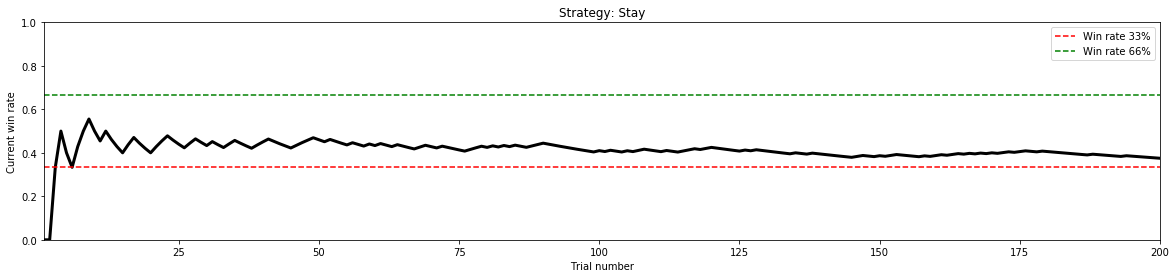

In [2]:
### Modify this part ########################################################## 

n_trials = 200
strategy = 'stay' # 'stay' or 'switch'
show_trials = False

###############################################################################
import random
import matplotlib.pyplot as plt
import numpy as np

def get_prize_index():
    '''Get index of the gate with the prize'''
    return random.randint(0, 2)

def get_first_choice():
    '''Make first random choice'''
    return random.randint(0, 2)

def get_opened_gate_index(prize_index, first_choice):
    '''Get index of the gate to open'''
    indices = list(range(3))
    indices.remove(prize_index)
    try:
        indices.remove(first_choice)
    except:
        pass
    return random.choice(indices)
    
def get_second_choice(first_choice, strategy, opened_gate):
    '''Make second choice according to strategy'''
    if strategy == 'stay':
        return first_choice
    else:
        choices = list(range(3))
        choices.remove(first_choice)
        choices.remove(opened_gate)
    return random.choice(choices)

def print_boxes(positions):
    lst = [' '] * 3
    for i, ch in positions:
        lst[i] = ch
    return '[' + ']['.join(lst) + ']'
    
outcomes = []

for trial in range(n_trials):

    prize_index = get_prize_index()
    first_choice = get_first_choice()
    opened_gate = get_opened_gate_index(prize_index, first_choice)
    second_choice = get_second_choice(first_choice, strategy, opened_gate)
    
    current_outcome = prize_index == second_choice
    outcomes.append(current_outcome)
    
    if show_trials:
        print(f' Trial #{trial+1} '.center(25, '='))
        print('Prize:'.ljust(15, ' '), print_boxes([(prize_index, 'N')]))
        print('First choice:'.ljust(15, ' '), print_boxes([(first_choice, 'x')]))
        print('Opened box:'.ljust(15, ' '), print_boxes([(prize_index, 'N'), (opened_gate, u"\u25A1")]))
        print('Second choice:'.ljust(15, ' '), print_boxes([(second_choice, '+' if current_outcome else '0')]))
        print('Outcome:'.ljust(15, ' '), 'Win!' if current_outcome else 'No win.', '\n')
    
print(f' Summary '.center(25, '*'))
print(f'Total wins: {sum(outcomes)} / {n_trials}')
print(f'Win rate: {sum(outcomes)/n_trials*100:.2f}%', '\n')

# Plotting
x_trials = np.arange(1, len(outcomes)+1)
y_win_rate = np.cumsum(outcomes) / np.arange(1, len(outcomes)+1)

fig, ax = plt.subplots(figsize=(20, 4), facecolor='w')

ax.plot(x_trials, y_win_rate, 'k', lineWidth=3)
ax.plot(x_trials, [1/3 for _ in x_trials], 'r--', label='Win rate 33%')
ax.plot(x_trials, [2/3 for _ in x_trials], 'g--', label='Win rate 66%')

ax.set_xlim([1, x_trials[-1]])
ax.set_ylim([0, 1])
ax.set_xlabel('Trial number')
ax.set_ylabel('Current win rate')
ax.set_title('Strategy: ' + strategy.capitalize())
ax.legend()
plt.show()

### Problem 2. Koło fortuny

Gramy w koło fortuny widoczne na obrazku poniżej. Po każdym zakręceniu koła możemy z równym prawdopodobiństwem wylosować jedno z trzech pól:
- pole **+1**: wówczas dostajemy 1zł i kręcimy jeszcze raz
- pole **+2**: wówczas dostajemy 2zł i kręcimy jeszcze raz
- pole **STOP**: wówczas kończymy grę

Pytania:
- **Jakiej (średniej) wygranej możemy oczekiwać po takiej loterii**
- Ile razy (średnio) będziemy kręcić kołem?
- Jak powyższe wartości zmienią się gdy do koła dodamy pola **+3**, **+4**, itd.?

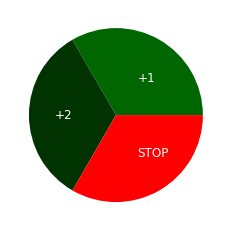

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4), facecolor='w')
plt.pie([1, 1, 1], labels=['+1', '+2', 'STOP'], 
        colors=['#006600','#003300','r'], labeldistance=.5, 
        textprops={'color': 'w', 'size': 12})
plt.show()

#### Symulacja 2

Poniższa symulacja pozwala na wielokrotne powtórzenie pojedynczego udziału w loterii i obrazuje rozkład wygranych oraz liczby powtórzeń kręcenia kołem w pojedynczej loterii. 

Parametry symulacji:
- `n_trials`: liczba powtórzeń loterii
- `show_trials`: zmienna określająca czy wyświetlać wynik każdej loterii (do wyboru `True` lub `False`) 

---
Dodatkowe źródła:
1. [Artykuł z Wikipedii](https://en.wikipedia.org/wiki/Expected_value)
2. Rozdział 2.2. z książki https://www.ibuk.pl/fiszka/160465/myslenie-statystyczne.html 


******** Summary ********
Average win: 2.96 PLN
Most frequent outcome: 0 PLN
Average sequence length: 1.99
Most frequent sequence length: 0 



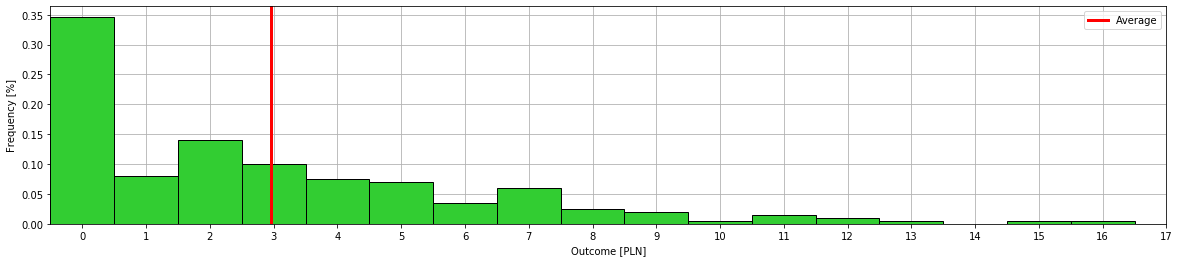

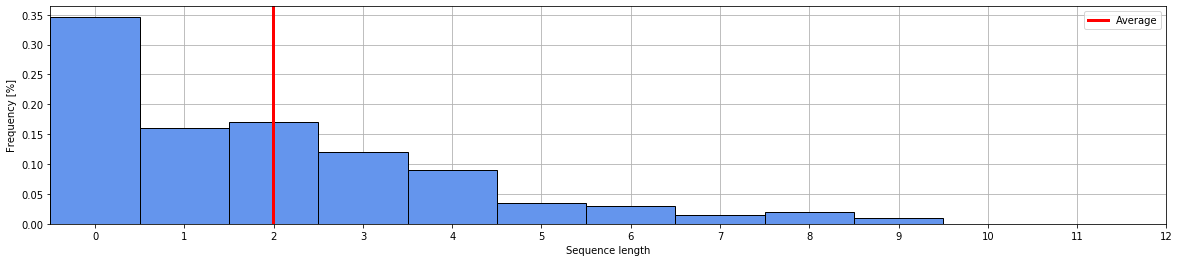

In [3]:
### Modify this part ########################################################## 

n_trials = 200
show_trials = False

###############################################################################
from random import randint
import matplotlib.pyplot as plt
import numpy as np

outcomes = []
seq_lengths = []

for trial in range(1, n_trials+1):

    money = []
    while True:
        current_field = randint(0, 2)
        if current_field == 0:
            break
        else:
            money.append(current_field)
    outcomes.append(sum(money))
    seq_lengths.append(len(money))
    
    if show_trials:
        sequence = ', '.join(['+' + str(m) for m in money]) + ', STOP' if money else 'STOP'
        print(f'Trial #{trial}: {sum(money)} PLN'.ljust(20, ' '), 'Outcomes:', sequence)

print('')
print(f' Summary '.center(25, '*'))
print('Average win:', np.mean(outcomes), 'PLN')
print('Most frequent outcome:', np.argmax(np.bincount(outcomes)), 'PLN')
print('Average sequence length:', np.mean(seq_lengths))
print('Most frequent sequence length:', np.argmax(np.bincount(seq_lengths)), '\n')

# Plotting 
def plot_histogram(data, xlabel, color='limegreen'):
    fig, ax = plt.subplots(figsize=(20, 4), facecolor='w')

    ax.hist(data, bins=np.arange(min(data)-.5, max(data)+.5, 1), 
            density=True, color=color, edgecolor='k')
    ax.axvline(np.mean(data), color='r', lineWidth=3, label='Average')

    ax.set_xlim([-.5, max(data)])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency [%]')
    ax.set_xticks(np.arange(0, max(data)+1))

    ax.set_axisbelow(True)
    ax.grid()
    ax.legend()
    plt.show()

plot_histogram(outcomes, xlabel='Outcome [PLN]')
plot_histogram(seq_lengths, xlabel='Sequence length', color='cornflowerblue')

### Problem 3. Testy diagnostyczne

Załóżmy, że dysponujemy precyzyjnym testem diagnostycznym na obecność wirusa SARS-CoV-2 w organizmie. Test ma skuteczność 99%, więc:
- Jeśli osoba testowana jest chora, to na 99% test da wynik dodatni (czułość 99%)
- Jeśli osoba testowana jest zdrowa, to na 99% test da wynik ujemny (swoistość 99%)

Poczyńmy również dla uproszczenia (miejmy nadzieję, że fałszywe) założenie, że w Polsce obecnie 1% populacji jest nosicielem wirusa. Wybieramy jedego losowego Polaka i testujemy. Wynik testu jest dodatni.  

Pytania:
- **Jakie (przy prawidziwości postawionych założeń) jest prawdopodobieństwo, że osoba jest zarażona?**
- Jak prawdopodobieństwo to zmienia się wraz ze zmianą:
    - czułości testu?
    - swoistości testu?
    - częstości występowania wirusa?

#### Symulacja 3

W tej symulacji wybierzemy z populacji próbę 10 000 osób i dla każdej z nich wykonamy "wirtualny" test na obecność wirusa. Następnie całą próbę podzielimy na 4 grupy:
- osoby zdrowe z ujemnym wynikiem testu (tzw. *true negative*)
- osoby zdrowe z fałszywie dodatnim wynikiem testu (tzw. *false positive*)
- osoby zarażone z fałszywie ujemnym wynikiem testu (tzw. *false negatives*)
- osoby zarażone z dodatnim wynikiem testu (tzw. *true positives*)

Symulacja pozwala na zobrazowanie wpływu czułości i swoistości testu oraz częstości występowania wirusa na średnią liczbę osób w każdej z grup. Przybliżoną odpowiedź na postawione pytanie dotyczące prawdopodobieństwo, że osoba jest zarażona pod warunkiem dodatniej wartości testu stanowi stosunek ludzi zarażonych z dodatnim wynikiem testu i wszystkich dodatnich wyników testu.  

Parametry symulacji:
- `sensitivity`: czułość testu
- `specificity`: swoistość testu
- `virus_freq`: odsetek ludzi zarażonych w populacji

---
Dodatkowe źródła:
1. [video od 3blue1brown](https://www.youtube.com/watch?v=HZGCoVF3YvM)
1. [video od Veritasium](https://www.youtube.com/watch?v=R13BD8qKeTg)
3. [artykuł z Wikipedii](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

Total infected:                                    1000 / 10000 (10.00%)

Not infected with negative test (true negative):   8536 / 10000 (85.36%)
Not infected with positive test (false positive):  464 / 10000 (4.64%)
Infected with negative test (false negative):      105 / 10000 (1.05%)
Infected with positive test (true positive):       895 / 10000 (8.95%)

Out of 1359 positively tested people only 895 (65.86%) is really infected.
Out of 8641 negatively tested people 8536 (98.78%) is not infected.



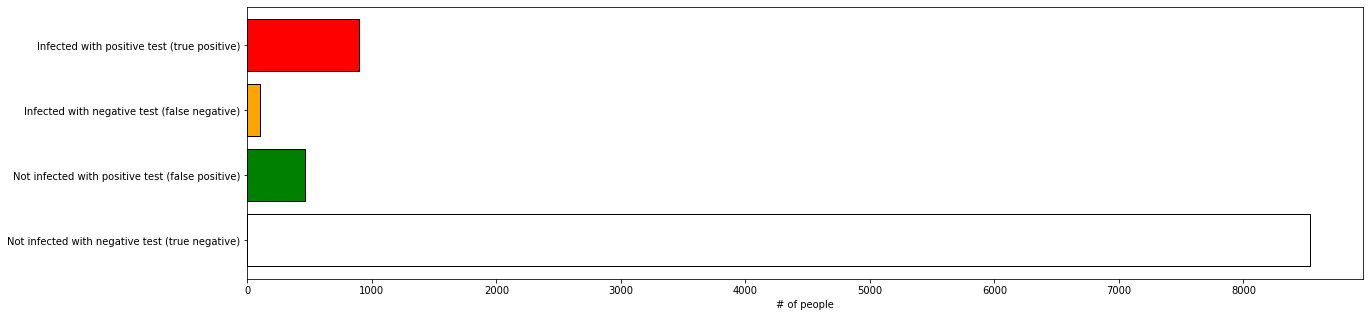

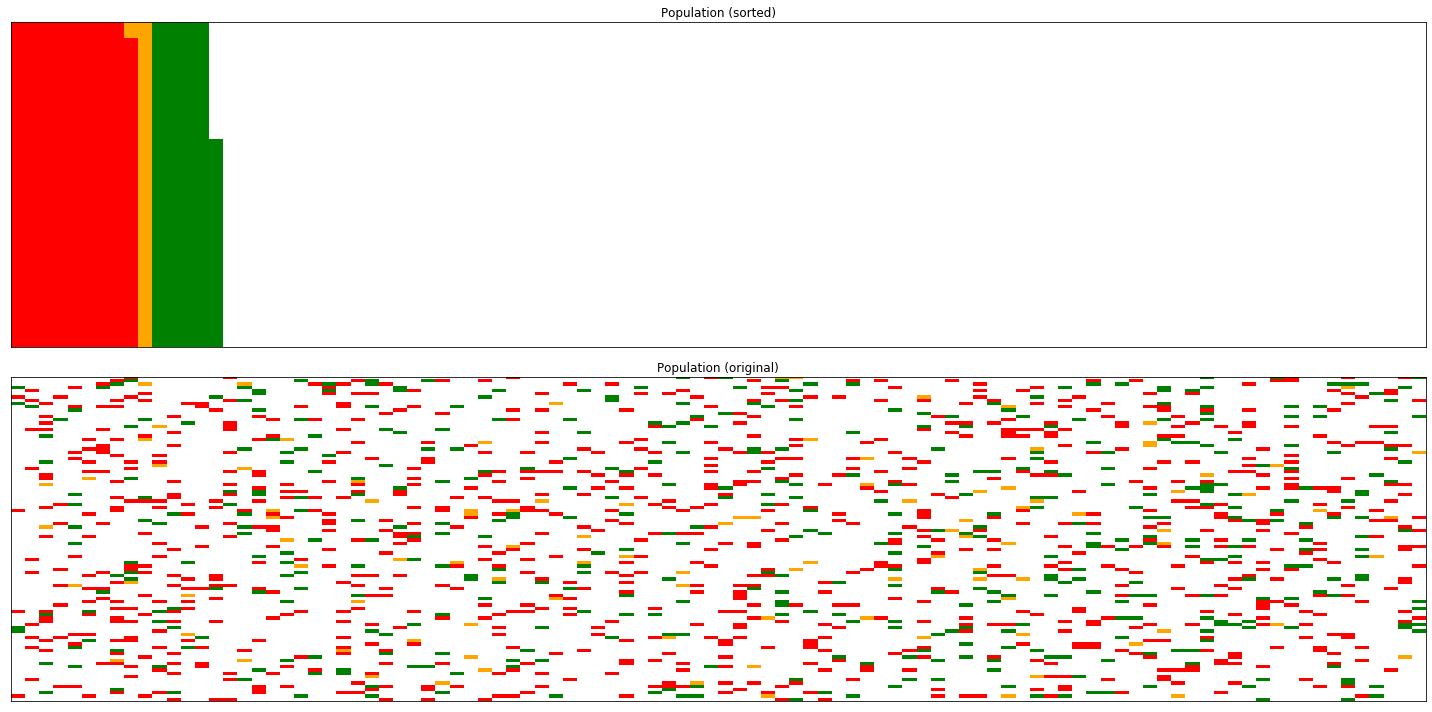

In [5]:
### Modify this part ########################################################## 

sensitivity = 0.9
specificity = 0.95
virus_freq = 0.1

###############################################################################
from random import random
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

n = 100
population = np.zeros((n, n), dtype=int)

for (i, j), _ in np.ndenumerate(population):
    
    if random() < virus_freq:
        # Infected
        if random() > sensitivity:
            # False negative
            population[i, j] = 2
        else:
            # True positive
            population[i, j] = 3
    else:
        # Not infected
        if random() > specificity:
            # False positive
            population[i, j] = 1
            
population_vec = np.ndarray.flatten(population)
outcome_types = np.bincount(population_vec) 
population_sorted = np.sort(population_vec).reshape((n, n))
        
n_not_infected = sum(outcome_types[:2])
n_infected = sum(outcome_types[2:])
n_positive = outcome_types[1] + outcome_types[3]
n_negative = outcome_types[0] + outcome_types[2]
    
labels = {
    0: 'Not infected with negative test (true negative)',
    1: 'Not infected with positive test (false positive)',
    2: 'Infected with negative test (false negative)',
    3: 'Infected with positive test (true positive)'
}

print('Total infected:'.ljust(50), 
      f'{n_infected} / {n**2} ({100*n_infected/n**2:.2f}%)\n')

for key, label in labels.items():
    print((label + ':').ljust(50), f'{outcome_types[key]} / {n**2} ({100*outcome_types[key]/n**2:.2f}%)')

print('')
print(f'Out of {n_positive} positively tested people only ' \
    + f'{outcome_types[3]} ({100*outcome_types[3]/n_positive:.2f}%) is really infected.')
print(f'Out of {n_negative} negatively tested people ' \
    + f'{outcome_types[0]} ({100*outcome_types[0]/n_negative:.2f}%) is not infected.\n')

# Bar plot
fig1, ax1 = plt.subplots(figsize=(20, 5), facecolor='w')

ax1.barh(np.arange(4), outcome_types, edgecolor='k', color=['white', 'green', 'orange', 'red'])

ax1.set_xlabel('# of people')
plt.yticks(np.arange(4), labels.values())
plt.show()

# Population plot
fig2, ax2 = plt.subplots(nrows=2, figsize=(20, 10), facecolor='w')

cmap = colors.ListedColormap(['white', 'green', 'orange', 'red'])
bounds = [-0.5, .5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

ax2[0].imshow(np.fliplr(population_sorted.T), cmap=cmap, norm=norm, aspect='auto')
ax2[0].set_title('Population (sorted)')
ax2[1].imshow(population, cmap=cmap, norm=norm, aspect='auto')
ax2[1].set_title('Population (original)')

for ax in ax2:
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.tight_layout()

### Problem 4. Urodziny

Jaka musi być minimalna liczba (losowo wybranych) osób, aby prawdopodobieństwo, że przynajmniej dwie z nich ma urodziny tego samego dnia roku było większe niż 50%? Dla uproszczenia przyjmijmy, że każdy rok składa się z 365 dni.

Przykładowo wybierajmy grupy 5 osób:
- *Grupa 1* 
    - Urodziny: 13 stycznia, 17 stycznia, 25 marca, 1 czerwca, 1 sierpnia
- *Grupa 2* 
    - Urodziny: 1 stycznia, 3 lutego, 11 listopada, 27 listopada, 12 października
- ...
- *Grupa 67* 
    - Urodziny: 6 styczeń, **15 kwietnia**, **15 kwietnia**, 19 września, 1 grudnia
- ...
    
Wielokrotnie powtarzając taki eksperyment przekonalibyśmy się, że tylko dla pewnego odsetka grup przynajmniej dwie osoby mają urodziny tego samego dnia. 

Pytania:
- **Jak liczna musi być taka grupa aby ten odsetek wynosił >50%?**
- Jak zmienia się to prawdopodobieństwo w zależności od liczności grupy?

Podpowiedź: Jakie są szanse, że wszyscy będą mieli urodziny innego dnia?

#### Symulacja 4

W tej symulacji dla ustalonej liczebości grupy będzie powtarzali doświadczenia wybierania próby z populacji. Dla każdej osoby z próby wylosujemy datę urodzenia i sprawdzimy czy dla całej próby można znaleźć przynajmniej dwie osoby z tą samą datą urodzenia. Licząc stosunek liczby prób w której daty urodzenia się powtórzyły do wszystkich prób, będziemy mogli oszacować szukane prawdopodobieństwo dla ustalonej liczebności grupy. Wykres pokazuje jak zmienia się nasza **estymacja** (oszacowanie) prawdopodobieństwa wraz z przeprowadzaniem kolejnych losowań.

Parametry symulacji:
- `n_people`: liczba osób w grupie
- `n_trials`: liczba prób
- `show_trials`: zmienna określająca czy wyświetlać wynik każdej loterii (do wyboru `True` lub `False`) 

---
Dodatkowe źródła:
1. [artykuł z Wikipedii](https://en.wikipedia.org/wiki/Birthday_problem)
2. [prezentacja z TED](https://www.youtube.com/watch?v=KtT_cgMzHx8)
3. [video od Vsauce2](https://www.youtube.com/watch?v=ofTb57aZHZs)

======== Trial #1 =======
Dates: 31/10 08/05 25/07 27/12 28/07 17/11 06/02 12/07 28/01 09/04 23/06 09/08 15/04 23/01 21/08 15/09 07/07 03/08 17/01 03/11 24/08 13/07 12/09
No repeated dates

======== Trial #2 =======
Dates: 21/10 18/02 21/10 07/01 09/11 06/07 09/08 07/09 07/06 02/07 16/09 14/05 20/10 28/11 10/09 08/02 21/04 22/06 16/12 26/09 21/01 29/01 11/02
21/10 occured 2 times

======== Trial #3 =======
Dates: 04/09 21/03 25/02 19/03 13/01 23/03 12/08 24/09 01/11 29/06 25/05 11/12 14/01 14/05 20/10 28/11 29/08 04/01 08/04 05/11 17/03 31/05 18/02
No repeated dates

======== Trial #4 =======
Dates: 04/04 18/03 06/07 23/03 13/10 25/09 06/06 20/08 28/05 27/11 03/05 20/03 28/02 02/05 30/05 06/12 04/09 16/05 21/07 17/06 21/12 25/03 16/03
No repeated dates

======== Trial #5 =======
Dates: 08/04 27/08 07/04 20/10 09/08 17/11 29/07 24/11 28/12 03/06 24/04 12/12 30/04 01/06 10/11 14/01 24/02 01/05 30/11 02/11 19/01 10/11 08/10
10/11 occured 2 times

======== Trial #6 =======
Dates: 18/11 30/

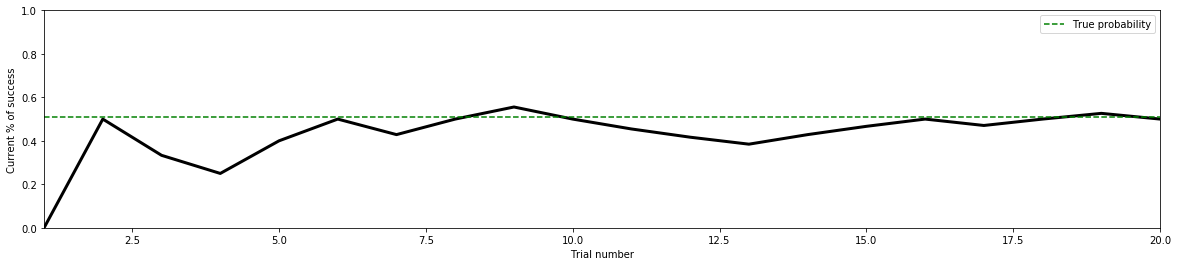

In [6]:
### Modify this part ########################################################## 

n_people = 23
n_trials = 20
show_trials = True

###############################################################################
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from math import factorial
from collections import Counter
from datetime import datetime, timedelta

def day_to_date(day_number):
    date =  datetime(2020, 1, 1) + timedelta(day_number - 1)
    return date.strftime('%d/%m')

true_p = 1 - factorial(365) / factorial(365 - n_people) / (365 ** n_people)

outcomes = []

for trial in range(n_trials):
    
    days = [randint(1, 365) for _ in range(n_people)]
    count = Counter(days)

    # Filter out single occurences
    count = {key: val for key, val in count.items() if val > 1}
    outcomes.append(0 if not count else 1)

    if show_trials:
        print(f' Trial #{trial+1} '.center(25, '='))
        print('Dates: ' + ' '.join([day_to_date(day) for day in days]))
        if not count:
            print('No repeated dates')
        else:
            print(', '.join([f'{day_to_date(key)} occured {val} times' for key, val in count.items()]))
        print('')

print('')
print(f' Summary '.center(25, '*'))
print(f'Repeated date frequency: {sum(outcomes)} / {n_trials} ({100*np.mean(outcomes):.2f}) \n')        
        
# Plotting
x_trials = np.arange(1, len(outcomes)+1)
y_win_rate = np.cumsum(outcomes) / np.arange(1, len(outcomes)+1)

fig, ax = plt.subplots(figsize=(20, 4), facecolor='w')

ax.plot(x_trials, y_win_rate, 'k', lineWidth=3)
ax.plot(x_trials, [true_p for _ in x_trials], 'g--', label='True probability')

ax.set_xlim([1, x_trials[-1]])
ax.set_ylim([0, 1])
ax.set_xlabel('Trial number')
ax.set_ylabel('Current % of success')
ax.legend()
plt.show()

### Problem 5. Siedzenia w samolocie

W samolocie jest 100 miejsc. Każdy pasażer otrzymuje swój bilet. Pasażerowie wchodzą do samolotu po kolei. Niestey pierwszy pasażer zgubił swój bilet. Życzliwa stewardessa pozwala mu usiąść na losowo wybranym miejscu. Każdy kolejny wsiadający pasażer (wszyscy mają swoje bilety) siada na swoim miejscu, lub wybiera inne losowe miejsce jeśli jego jest już zajęte. 

Pytania:
- **Jakie jest prawdopodobieństwo, że ostatni pasażer będzie siedział na swoim miejscu?**

Podpowiedź: Zastanów się, które siedzenia są istotne w tym problemie oraz jak wygląda proces ich zajmowania.

### Problem 6. Spotkanie

Alicja i Bob umówili się w restauracji między 19:00 a 20:00. Każda osoba przychodzi o losowej godzinie w umówionym przedziale i (jeśli jest pierwsza) czeka na drugą osobę dokładnie przez 15 minut. Po 15 minutach, jeśli druga osoba się nie zjawi, pierwsza osoba wychodzi. 

Pytanie:
- **Oblicz jakie jest prawdopodobieństwo, że Alicja i Bob się spotkają?**
- Jak to prawdopodobieńnstwo zależy od maksymalnego czasu oczekiwania?

Podpowiedź: Spróbuj narysować sytuację na wykresie zależności czasu przyjścia Boba od czasu przyjścia Alicji.

#### Symulacja 6

W tej symulacji wielokrotnie wylosujemy czas przyjścia Alicji i Boba i zobaczymy w jakim odsetku przypadków dojdzie do ich spotkania. Każda próba z symulacji zostana zaznaczonana wykresie zależności czasu przyjścia Boba od czasu przyjścia Alicji w postaci (1) punktu zieloneg, jeśli czas oczekiwania jest mniejszy od ustalonego lub (2) punktu czerwonego, jeśli czas oczekiwania jest większy od ustalonego. Rozkład czasu oczekiwania będzie również przedstawiony na histogramie. 

Parametry symulacji:
- `n_trials`: liczba prób 
- `time_wait`: maksymalny czas oczekiwania (w minutach)
- `time_window`: czas przeznaczony na spotkanie (w minutach)
- `show_trials`: zmienna określająca czy wyświetlać wynik każdej próby (do wyboru `True` lub `False`) 

---
Dodatkowe źródła:
1. [artykuł z Brilliant](https://brilliant.org/wiki/1-dimensional-geometric-probability/)
3. [rozwiązanie z GeeksforGeek](https://www.geeksforgeeks.org/probability-that-two-persons-will-meet/)

******** Summary ********
Average waiting time: 18.02 minutes
Most frequent outcome: 2 minutes
Est. meeting probability: 48.00%



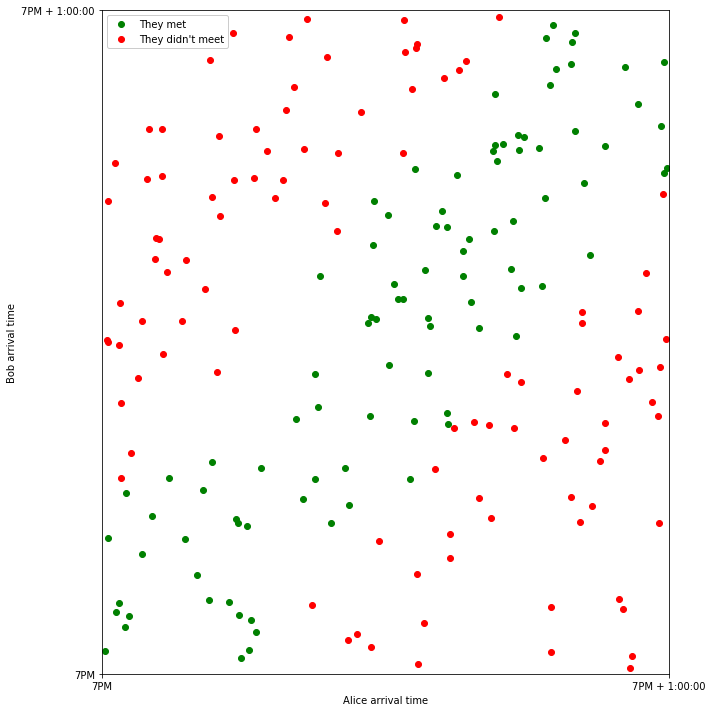

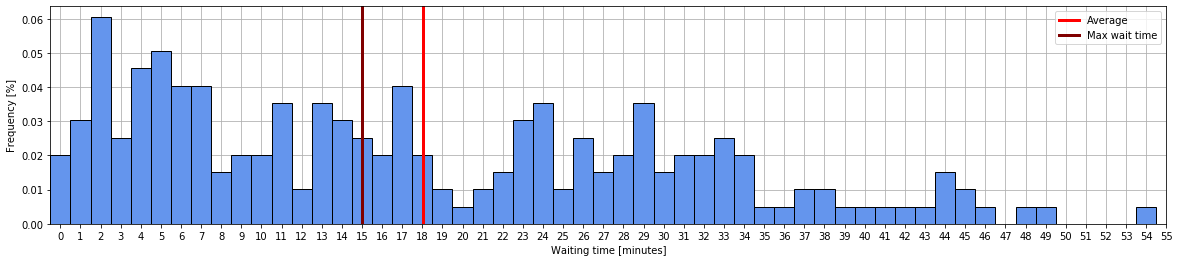

In [7]:
### Modify this part ########################################################## 

n_trials = 200
time_wait = 15
time_window = 60
show_trials = False

###############################################################################
import matplotlib.pyplot as plt
from random import random
from math import floor
from datetime import timedelta

dt_max = timedelta(minutes=round(time_wait))
dt_win = timedelta(minutes=round(time_window))

t_a_log, t_b_log, meetings = [], [], []

for trial in range(n_trials):

    t_a = timedelta(seconds=round(time_window * 60 * random()))
    t_b = timedelta(seconds=round(time_window * 60 * random()))
    dt_wait = abs(t_a - t_b)

    meeting = dt_wait < dt_max

    t_a_log.append(t_a)
    t_b_log.append(t_b)
    meetings.append(meeting)
    
    if show_trials:
        print(f' Trial #{trial+1} '.center(25, '='))
        print(f'Alice time: {str(t_a)} after 19:00')
        print(f'Bob time:   {str(t_b)} after 19:00')
        print(f'Difference: {str(dt_wait)} {"<" if dt_wait < dt_max else ">"} {str(dt_max)} max waiting time.')
        print(f'Meeting?    {"Yes" if meeting else "No"}\n')

t_success = [(t_a.seconds, t_b.seconds) for t_a, t_b, m in zip(t_a_log, t_b_log, meetings) if m]
t_fail = [(t_a.seconds, t_b.seconds) for t_a, t_b, m in zip(t_a_log, t_b_log, meetings) if not m]
        
data = [round(abs(t_a-t_b).seconds/60) for t_a, t_b in zip(t_a_log, t_b_log)]    

print(f' Summary '.center(25, '*'))
print('Average waiting time:', np.mean(data), 'minutes')
print('Most frequent outcome:', np.argmax(np.bincount(data)), 'minutes')
print(f'Est. meeting probability: {100*len(t_success)/n_trials:.2f}%\n')
    
# Geometric meeting
fig1, ax1 = plt.subplots(figsize=(10, 10), facecolor='w')

ax1.plot([a for a, b in t_success], [b for a, b in t_success], 'go', label='They met')
ax1.plot([a for a, b in t_fail], [b for a, b in t_fail], 'ro', label='They didn\'t meet')

ax1.set_xlim(0, time_window * 60)
ax1.set_ylim(0, time_window * 60)
ax1.set_xticks([0, time_window * 60])
ax1.set_yticks([0, time_window * 60])
ax1.set_xticklabels(['7PM', '7PM + ' + str(dt_win)])
ax1.set_yticklabels(['7PM', '7PM + ' + str(dt_win)])
ax1.set_xlabel('Alice arrival time')
ax1.set_ylabel('Bob arrival time')
ax1.legend(loc='upper left', framealpha=1)

plt.tight_layout()
plt.show()

# Histogram 
fig2, ax2 = plt.subplots(figsize=(20, 4), facecolor='w')

ax2.hist(data, bins=np.arange(min(data)-.5, max(data)+.5, 1), 
        density=True, color='cornflowerblue', edgecolor='k')
ax2.axvline(np.mean(data), color='r', lineWidth=3, label='Average')
ax2.axvline(time_wait, color='maroon', lineWidth=3, label='Max wait time')

ax2.set_xlim([-.5, max(data)])
ax2.set_xlabel('Waiting time [minutes]')
ax2.set_ylabel('Frequency [%]')
ax2.set_xticks(np.arange(0, max(data)+1))

ax2.set_axisbelow(True)
ax2.grid()
ax2.legend()
plt.show()
